데이터 편향성 확인을 위한 코드

In [ ]:
import torch
import h5py
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from tqdm import tqdm

In [ ]:
# 데이터셋 경로와 키 설정
data_dir = '/home/Data/train/image'
input_key = 'image_input'
target_key = 'image_label'

def load_data(file_path, input_key, target_key, device='cuda'):
    with h5py.File(file_path, 'r') as f:
        masked_data = torch.tensor(np.array(f[input_key]), device=device)
        original_data = torch.tensor(np.array(f[target_key]), device=device)
    return masked_data, original_data

기존의 data/load_data 모듈을 활용할 수 있는 방법은 없을까?
우리에게 주어진 데이터셋의 구조를 한 번 더 확인해볼 필요가 있을 듯

In [ ]:
def calculate_deviation(masked, original):
    deviation = torch.abs(original - masked)
    return deviation

def visualize_deviation_histogram(deviation, title='Deviation between Original and Masked Data'):
    deviation_cpu = deviation.cpu().numpy()
    plt.figure(figsize=(10, 6))
    plt.hist(deviation_cpu.flatten(), bins=50, alpha=0.75)
    plt.title(title)
    plt.xlabel('Deviation')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
    
def analyze_bias(data_dir, input_key, target_key, device='cuda'):
    all_deviation = []

    # 데이터 파일 리스트 가져오기
    data_files = list(Path(data_dir).rglob('*.h5'))
    
    for file_path in tqdm(data_files, desc="Processing files"):
        masked_data, original_data = load_data(file_path, input_key, target_key, device)
        deviation = calculate_deviation(masked_data, original_data)
        all_deviation.append(deviation.cpu().numpy())
    
    # 전체 편차 데이터 결합
    all_deviation = np.concatenate(all_deviation)
    visualize_deviation_histogram(torch.tensor(all_deviation), title="Overall Deviation Histogram")

어떻게 시각화해야 데이터의 편향성을 쉽게 찾아낼 수 있을까?
관련 모듈이 존재할까?

In [ ]:
analyze_bias(data_dir, input_key, target_key)

## 데이터 형태 확인

# 데이터셋 경로와 키 설정
data_dir = '/home/Data/train/image'
input_key = 'image_input'
target_key = 'image_label'

def load_data(file_path, input_key, target_key, device='cuda'):
    with h5py.File(file_path, 'r') as f:
        masked_data = torch.tensor(np.array(f[input_key]), device=device)
        original_data = torch.tensor(np.array(f[target_key]), device=device)
    return masked_data, original_data

### 이미지 확인

In [ ]:
import h5py
from pathlib import Path

def check_hdf5_files_structure(data_dir):
    data_dir = Path(data_dir)
    hdf5_files = list(data_dir.glob("*.h5"))  # .h5 파일만 선택

    for hdf5_file in hdf5_files:
        print(f"Checking file: {hdf5_file}")
        with h5py.File(hdf5_file, 'r') as f:
            def print_attrs(name, obj):
                if isinstance(obj, h5py.Dataset):
                    print(f"Dataset: {name}")
                    print(f" - Shape: {obj.shape}")
                    print(f" - Dtype: {obj.dtype}")
                elif isinstance(obj, h5py.Group):
                    print(f"Group: {name}")
            
            f.visititems(print_attrs)
        print("\n")

# 데이터 디렉토리 설정
data_dir = '/home/Data/train/image'

# 디렉토리 구조 확인
check_hdf5_files_structure(data_dir)

## 이미지 픽셀값 범위 확인

In [11]:
import h5py
from pathlib import Path

def check_hdf5_files_structure(data_dirs):
    for data_dir in data_dirs:
        data_dir = Path(data_dir)
        hdf5_files = list(data_dir.glob("*.h5"))  # .h5 파일만 선택

        if not hdf5_files:
            print(f"No HDF5 files found in directory: {data_dir}")
            continue

        for hdf5_file in hdf5_files:
            print(f"Checking file: {hdf5_file}")
            try:
                with h5py.File(hdf5_file, 'r') as f:
                    def print_attrs(name, obj):
                        if isinstance(obj, h5py.Dataset):
                            print(f"Dataset: {name}")
                            print(f" - Shape: {obj.shape}")
                            print(f" - Dtype: {obj.dtype}")
                            
                            # Calculate and print the range of pixel values
                            data = obj[()]  # Load the dataset into memory
                            min_val = data.min()
                            max_val = data.max()
                            print(f" - Pixel Value Range: [{min_val}, {max_val}]")
                        elif isinstance(obj, h5py.Group):
                            print(f"Group: {name}")
                    
                    f.visititems(print_attrs)
            except Exception as e:
                print(f"Error reading file {hdf5_file}: {e}")
            print("\n")

# 데이터 디렉토리 설정
data_dirs = [
    '/root/result/test_Varnet/reconstructions_leaderboard/private'
]

# 디렉토리 구조 확인
check_hdf5_files_structure(data_dirs)


Checking file: /root/result/test_Varnet/reconstructions_leaderboard/private/brain_test50.h5
Dataset: reconstruction
 - Shape: (16, 384, 384)
 - Dtype: float32
 - Pixel Value Range: [5.193791366764344e-06, 0.0007516758632846177]


Checking file: /root/result/test_Varnet/reconstructions_leaderboard/private/brain_test1.h5
Dataset: reconstruction
 - Shape: (16, 384, 384)
 - Dtype: float32
 - Pixel Value Range: [3.013522700712201e-06, 0.000534361635800451]


Checking file: /root/result/test_Varnet/reconstructions_leaderboard/private/brain_test10.h5
Dataset: reconstruction
 - Shape: (16, 384, 384)
 - Dtype: float32
 - Pixel Value Range: [2.9095208446960896e-06, 0.0005465659196488559]


Checking file: /root/result/test_Varnet/reconstructions_leaderboard/private/brain_test49.h5
Dataset: reconstruction
 - Shape: (16, 384, 384)
 - Dtype: float32
 - Pixel Value Range: [4.143629666941706e-06, 0.0007096106419339776]


Checking file: /root/result/test_Varnet/reconstructions_leaderboard/private/brain

### k-space 확인

In [ ]:
# 데이터 디렉토리 설정
data_dir = '/home/Data/train/kspace'

# 디렉토리 구조 확인
check_hdf5_files_structure(data_dir)

### 함께 확인

In [ ]:
import h5py
from pathlib import Path

def check_hdf5_files_structure(file_path):
    print(f"Checking file: {file_path}")
    with h5py.File(file_path, 'r') as f:
        def print_attrs(name, obj):
            if isinstance(obj, h5py.Dataset):
                print(f"Dataset: {name}")
                print(f" - Shape: {obj.shape}")
                print(f" - Dtype: {obj.dtype}")
            elif isinstance(obj, h5py.Group):
                print(f"Group: {name}")
        
        f.visititems(print_attrs)
    print("\n")

def find_common_files(dir1, dir2):
    dir1_files = {f.name for f in Path(dir1).glob("*.h5")}
    dir2_files = {f.name for f in Path(dir2).glob("*.h5")}
    common_files = dir1_files.intersection(dir2_files)
    return common_files

# 디렉토리 설정
data_dir_kspace = '/home/Data/train/kspace'
data_dir_image = '/home/Data/train/image'

# 공통 파일 찾기
common_files = find_common_files(data_dir_kspace, data_dir_image)
print(f"Common files: {common_files}\n")

# 공통 파일의 구조 확인
for file_name in common_files:
    print(f"Checking structures for file: {file_name}")
    
    kspace_file_path = Path(data_dir_kspace) / file_name
    image_file_path = Path(data_dir_image) / file_name
    
    print("Kspace file structure:")
    check_hdf5_files_structure(kspace_file_path)
    
    print("Image file structure:")
    check_hdf5_files_structure(image_file_path)


In [ ]:
import h5py
from pathlib import Path

def check_hdf5_files_structure(file_path):
    print(f"Checking file: {file_path}")
    with h5py.File(file_path, 'r') as f:
        def print_attrs(name, obj):
            if isinstance(obj, h5py.Dataset):
                print(f"Dataset: {name}")
                print(f" - Shape: {obj.shape}")
                print(f" - Dtype: {obj.dtype}")
            elif isinstance(obj, h5py.Group):
                print(f"Group: {name}")
        
        f.visititems(print_attrs)
    print("\n")

def find_common_files(dir1, dir2):
    dir1_files = {f.name for f in Path(dir1).glob("*.h5")}
    dir2_files = {f.name for f in Path(dir2).glob("*.h5")}
    common_files = dir1_files.intersection(dir2_files)
    return common_files

def print_mask_values(file_path):
    with h5py.File(file_path, 'r') as f:
        if 'mask' in f:
            mask = f['mask'][:]
            print(f"mask values from {file_path}:")
            print(mask)
        else:
            print(f"No mask dataset found in {file_path}")

# 디렉토리 설정
data_dir_kspace = '/home/Data/leaderboard/acc9/kspace'
data_dir_image = '/home/Data/leaderboard/acc9/image'
# data_dir_kspace = '/root/result/test_Varnet/reconstructions_leaderboard/private'
# data_dir_image = '/root/result/test_Varnet/reconstructions_leaderboard/private'

# 공통 파일 찾기
common_files = find_common_files(data_dir_kspace, data_dir_image)
print(f"Common files: {common_files}\n")

# 공통 파일의 구조 확인 및 mask 값 출력
for file_name in common_files:
    print(f"Checking structures for file: {file_name}")
    
    kspace_file_path = Path(data_dir_kspace) / file_name
    image_file_path = Path(data_dir_image) / file_name
    
    print("Kspace file structure:")
    check_hdf5_files_structure(kspace_file_path)
    
    print("Image file structure:")
    check_hdf5_files_structure(image_file_path)
    
    # mask 값 출력
    print("Kspace file mask values:")
    print_mask_values(kspace_file_path)
    
    print("Image file mask values:")
    print_mask_values(image_file_path)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from fastmri.data.subsample import RandomMaskFunc

# RandomMaskFunc 초기화
mask_func = RandomMaskFunc(center_fractions=[0.04], accelerations=[8])

# k-space 데이터 형태 정의
shape = (1, 256, 256)  # 3차원으로 설정 (num_slices, height, width)

# 마스크 생성
mask = mask_func(shape)

# 마스크 값 출력
print("Generated mask values:")
print(mask)

# 마스크 시각화
plt.figure(figsize=(10, 2))
plt.imshow(mask[0], aspect='auto', cmap='gray')  # 첫 번째 slice의 마스크 시각화
plt.xlabel('k-space columns')
plt.ylabel('k-space rows')
plt.title('k-space Mask')
plt.colorbar()
plt.show()


## SSIM 값 확인

In [ ]:
import h5py
import torch
import torch.nn as nn
import numpy as np
from pathlib import Path

In [ ]:
class SSIM(nn.Module):
    """Layer to compute the SSIM loss between a pair of images"""
    def __init__(self):
        super(SSIM, self).__init__()
        self.mu_x_pool   = nn.AvgPool2d(3, 1)
        self.mu_y_pool   = nn.AvgPool2d(3, 1)
        self.sig_x_pool  = nn.AvgPool2d(3, 1)
        self.sig_y_pool  = nn.AvgPool2d(3, 1)
        self.sig_xy_pool = nn.AvgPool2d(3, 1)

        # 입력 경계의 반사를 사용하여 상/하/좌/우에 입력 텐서를 추가로 채웁니다.
        self.refl = nn.ReflectionPad2d(1)

        self.C1 = 0.001 ** 2
        self.C2 = 0.03 ** 2

    def forward(self, x, y):
        # shape : (xh, xw) -> (xh + 2, xw + 2)
        x = self.refl(x) 
        # shape : (yh, yw) -> (yh + 2, yw + 2)
        y = self.refl(y)

        mu_x = self.mu_x_pool(x)
        mu_y = self.mu_y_pool(y)

        sigma_x  = self.sig_x_pool(x ** 2) - mu_x ** 2
        sigma_y  = self.sig_y_pool(y ** 2) - mu_y ** 2
        sigma_xy = self.sig_xy_pool(x * y) - mu_x * mu_y

        SSIM_n = (2 * mu_x * mu_y + self.C1) * (2 * sigma_xy + self.C2)
        SSIM_d = (mu_x ** 2 + mu_y ** 2 + self.C1) * (sigma_x + sigma_y + self.C2)

        # SSIM score
        return torch.clamp((SSIM_n / SSIM_d) / 2, 0, 1)

        # Loss function
        # return torch.clamp((1 - SSIM_n / SSIM_d) / 2, 0, 1)


In [ ]:
def read_hdf5_datasets(file_path, dataset_names):
    datasets = {}
    with h5py.File(file_path, 'r') as f:
        for name in dataset_names:
            if name in f:
                datasets[name] = f[name][:]
            else:
                print(f"No {name} dataset found in {file_path}")
                datasets[name] = None
    return datasets

def calculate_ssim_for_images(label, input_data, grappa, ssim_module):
    if label is not None and input_data is not None:
        ssim_input = ssim_module(label, input_data)
        print(f"SSIM between label and input:\n{ssim_input}")

    if label is not None and grappa is not None:
        ssim_grappa = ssim_module(label, grappa)
        print(f"SSIM between label and grappa:\n{ssim_grappa}")

data_dir_image = '/home/Data/train/image'
common_files = {f.name for f in Path(data_dir_image).glob("*.h5")}
dataset_names = ['image_label', 'image_input', 'image_grappa']

ssim_module = SSIM()

for file_name in common_files:
    print(f"Checking structures for file: {file_name}")
    
    image_file_path = Path(data_dir_image) / file_name
    
    datasets = read_hdf5_datasets(image_file_path, dataset_names)
    
    label = datasets['image_label']
    input_data = datasets['image_input']
    grappa = datasets['image_grappa']
    
    if label is not None:
        label = torch.tensor(label, dtype=torch.float32).unsqueeze(1)
    if input_data is not None:
        input_data = torch.tensor(input_data, dtype=torch.float32).unsqueeze(1)
    if grappa is not None:
        grappa = torch.tensor(grappa, dtype=torch.float32).unsqueeze(1)
    
    calculate_ssim_for_images(label, input_data, grappa, ssim_module)


In [ ]:
def check_data_values(label, input_data, grappa):
    print("Checking data values...")
    if label is not None:
        print("Label data:")
        print(label)
    if input_data is not None:
        print("Input data:")
        print(input_data)
    if grappa is not None:
        print("Grappa data:")
        print(grappa)


In [ ]:
def convert_to_tensor(data):
    if data is not None:
        return torch.tensor(data, dtype=torch.float32).unsqueeze(1)
    return None


In [ ]:
import h5py
import torch
import torch.nn as nn
import numpy as np
from pathlib import Path

class SSIM(nn.Module):
    """Layer to compute the SSIM loss between a pair of images"""
    def __init__(self):
        super(SSIM, self).__init__()
        self.mu_x_pool   = nn.AvgPool2d(3, 1)
        self.mu_y_pool   = nn.AvgPool2d(3, 1)
        self.sig_x_pool  = nn.AvgPool2d(3, 1)
        self.sig_y_pool  = nn.AvgPool2d(3, 1)
        self.sig_xy_pool = nn.AvgPool2d(3, 1)

        self.refl = nn.ReflectionPad2d(1)

        # Adjusted constants for numerical stability
        self.C1 = 0.01
        self.C2 = 0.03

    def forward(self, x, y):
        x = self.refl(x) 
        y = self.refl(y)

        mu_x = self.mu_x_pool(x)
        mu_y = self.mu_y_pool(y)

        sigma_x  = self.sig_x_pool(x ** 2) - mu_x ** 2
        sigma_y  = self.sig_y_pool(y ** 2) - mu_y ** 2
        sigma_xy = self.sig_xy_pool(x * y) - mu_x * mu_y

        SSIM_n = (2 * mu_x * mu_y + self.C1) * (2 * sigma_xy + self.C2)
        SSIM_d = (mu_x ** 2 + mu_y ** 2 + self.C1) * (sigma_x + sigma_y + self.C2)

        return torch.clamp((SSIM_n / SSIM_d) / 2, 0, 1)

def read_hdf5_datasets(file_path, dataset_names):
    datasets = {}
    with h5py.File(file_path, 'r') as f:
        for name in dataset_names:
            if name in f:
                datasets[name] = f[name][:]
            else:
                print(f"No {name} dataset found in {file_path}")
                datasets[name] = None
    return datasets

def convert_to_tensor(data):
    if data is not None:
        data = data.astype(np.float32)
        # Normalize data to range [0, 1]
        data_min, data_max = np.min(data), np.max(data)
        data = (data - data_min) / (data_max - data_min)
        return torch.tensor(data, dtype=torch.float32).unsqueeze(1)
    return None

def check_data_values(label, input_data, grappa):
    print("Checking data values...")
    if label is not None:
        print("Label data:")
        print(label)
    if input_data is not None:
        print("Input data:")
        print(input_data)
    if grappa is not None:
        print("Grappa data:")
        print(grappa)

def calculate_ssim_for_images(label, input_data, grappa, ssim_module):
    if label is not None and input_data is not None:
        ssim_input = ssim_module(label, input_data)
        print(f"SSIM between label and input:\n{ssim_input}")

    if label is not None and grappa is not None:
        ssim_grappa = ssim_module(label, grappa)
        print(f"SSIM between label and grappa:\n{ssim_grappa}")

data_dir_image = '/home/Data/leaderboard/acc9/image'
common_files = {f.name for f in Path(data_dir_image).glob("*.h5")}
dataset_names = ['image_label', 'image_input', 'image_grappa']

ssim_module = SSIM()

for file_name in common_files:
    print(f"Checking structures for file: {file_name}")
    
    image_file_path = Path(data_dir_image) / file_name
    
    datasets = read_hdf5_datasets(image_file_path, dataset_names)
    
    label = convert_to_tensor(datasets['image_label'])
    input_data = convert_to_tensor(datasets['image_input'])
    grappa = convert_to_tensor(datasets['image_grappa'])
    
    check_data_values(label, input_data, grappa)
    
    calculate_ssim_for_images(label, input_data, grappa, ssim_module)


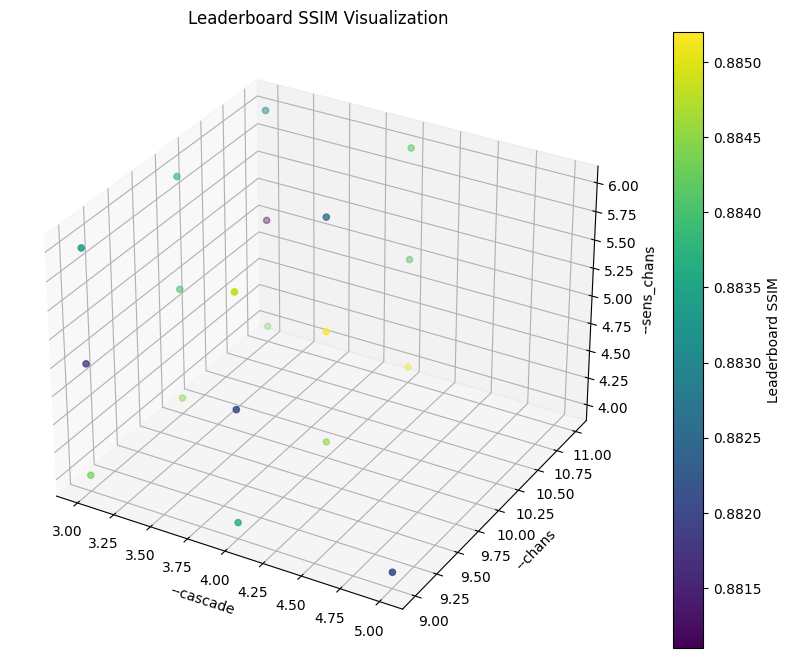

In [1]:
import matplotlib.pyplot as plt

# 데이터를 리스트로 정리
cascades = [3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5]
chans = [9, 9, 9, 10, 10, 10, 11, 11, 11, 9, 9, 9, 10, 10, 10, 11, 11, 11, 9]
sens_chans = [4, 5, 6, 4, 5, 6, 4, 5, 6, 4, 5, 6, 4, 5, 6, 4, 5, 6, 4]
leaderboard_ssim = [0.8843, 0.8817, 0.8834, 0.8845, 0.8840, 0.8839, 0.8843, 0.8811, 0.8829, 
                    0.8836, 0.8821, 0.8848, 0.8845, 0.8852, 0.8825, 0.8851, 0.8841, 0.8842, 0.8821]

# 그래프 그리기
fig = plt.figure(figsize=(12, 8))

ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(cascades, chans, sens_chans, c=leaderboard_ssim, cmap='viridis', marker='o')
ax.set_xlabel('--cascade')
ax.set_ylabel('--chans')
ax.set_zlabel('--sens_chans')
fig.colorbar(sc, ax=ax, label='Leaderboard SSIM')

plt.title('Leaderboard SSIM Visualization')
plt.show()


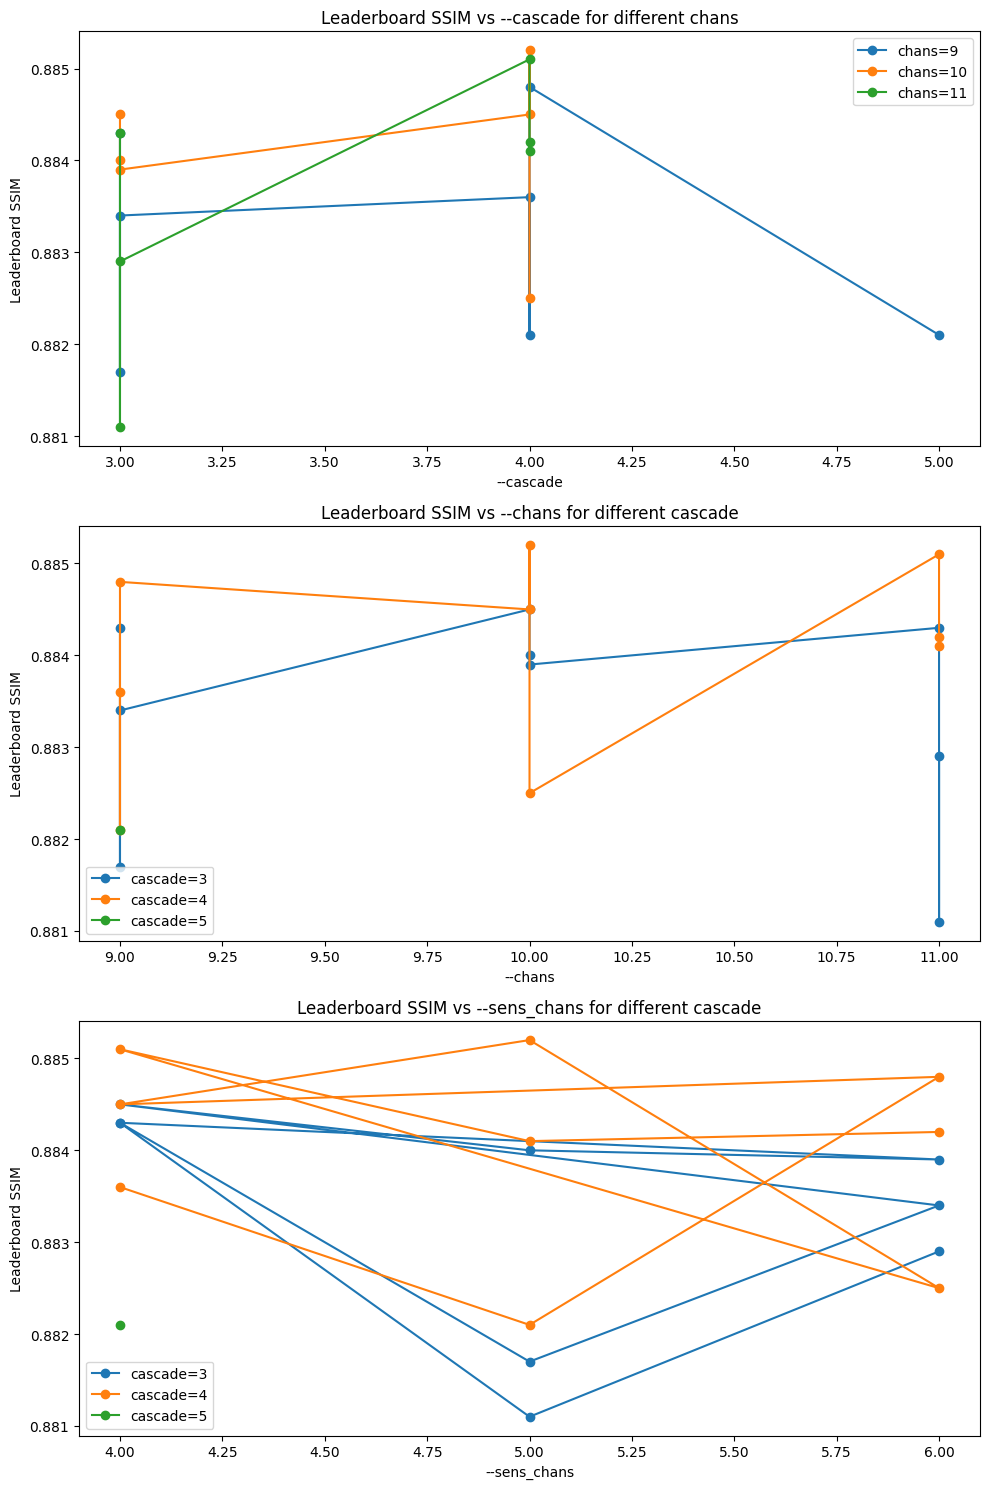

In [2]:
import matplotlib.pyplot as plt

# 데이터를 리스트로 정리
cascades = [3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5]
chans = [9, 9, 9, 10, 10, 10, 11, 11, 11, 9, 9, 9, 10, 10, 10, 11, 11, 11, 9]
sens_chans = [4, 5, 6, 4, 5, 6, 4, 5, 6, 4, 5, 6, 4, 5, 6, 4, 5, 6, 4]
leaderboard_ssim = [0.8843, 0.8817, 0.8834, 0.8845, 0.8840, 0.8839, 0.8843, 0.8811, 0.8829, 
                    0.8836, 0.8821, 0.8848, 0.8845, 0.8852, 0.8825, 0.8851, 0.8841, 0.8842, 0.8821]

# 그래프 그리기
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# 그래프 1: --cascade vs Leaderboard SSIM (각 chans 값에 대해)
for chan in set(chans):
    filtered_ssim = [leaderboard_ssim[i] for i in range(len(cascades)) if chans[i] == chan]
    filtered_cascades = [cascades[i] for i in range(len(cascades)) if chans[i] == chan]
    axs[0].plot(filtered_cascades, filtered_ssim, marker='o', label=f'chans={chan}')
axs[0].set_xlabel('--cascade')
axs[0].set_ylabel('Leaderboard SSIM')
axs[0].set_title('Leaderboard SSIM vs --cascade for different chans')
axs[0].legend()

# 그래프 2: --chans vs Leaderboard SSIM (각 cascade 값에 대해)
for cascade in set(cascades):
    filtered_ssim = [leaderboard_ssim[i] for i in range(len(cascades)) if cascades[i] == cascade]
    filtered_chans = [chans[i] for i in range(len(cascades)) if cascades[i] == cascade]
    axs[1].plot(filtered_chans, filtered_ssim, marker='o', label=f'cascade={cascade}')
axs[1].set_xlabel('--chans')
axs[1].set_ylabel('Leaderboard SSIM')
axs[1].set_title('Leaderboard SSIM vs --chans for different cascade')
axs[1].legend()

# 그래프 3: --sens_chans vs Leaderboard SSIM (각 cascade 값에 대해)
for cascade in set(cascades):
    filtered_ssim = [leaderboard_ssim[i] for i in range(len(cascades)) if cascades[i] == cascade]
    filtered_sens_chans = [sens_chans[i] for i in range(len(cascades)) if cascades[i] == cascade]
    axs[2].plot(filtered_sens_chans, filtered_ssim, marker='o', label=f'cascade={cascade}')
axs[2].set_xlabel('--sens_chans')
axs[2].set_ylabel('Leaderboard SSIM')
axs[2].set_title('Leaderboard SSIM vs --sens_chans for different cascade')
axs[2].legend()

plt.tight_layout()
plt.show()
